# Support Vector Regression (SVR)

## Importing the libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [42]:
data_set = pd.read_csv("Position_Salaries.csv")
x = data_set.iloc[:, 1:-1].values
y = data_set.iloc[:, -1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [43]:
# Converting 1D array to 2D array. 2D array is the format that is need for feature scaling. 
# Note both x and y needs to be in the same format(2D array format)

y = y.reshape(len(y), 1) 
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [44]:
# Exceptionally applying feature scaling on the whole data set.
# Because if feature scaling is not applied, position values gets neglected as the salary is more when compared to position.
# Hence FS is important, to not ignore any of the values..

# We dont apply FS on dummy variables resulted from one-hot encoding

In [45]:
# Creating two seperate standard scalers on x(position) and y(salary)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [46]:
# We have kernels which can either learn some linear relationships and that's the linear kernel or nonlinear relationships which are the nonlinear kernel such as the RPF radial basis.
# That's one such - Gaussian RBF (Radiak Basis Function) kernel

# There are other SVM kernel functions like - Polynomial kernel, Gaussian kernel, Gaussian RBF kernel, Laplace RBF kernel, Hyperbolic tangent kernel, Sigmoid kernel and so on..

In [47]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [48]:
regressor.predict([[6.5]])

array([0.01158103])

In [50]:
# Reverse the scaling - As we have scaled already, we have to reaverse the scaling to see the prediction

print(regressor.predict(sc_x.transform([[6.5]])))
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

# Conclusion - Our predicted salary is higher than the requested salary

[-0.27861589]


array([170370.0204065])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

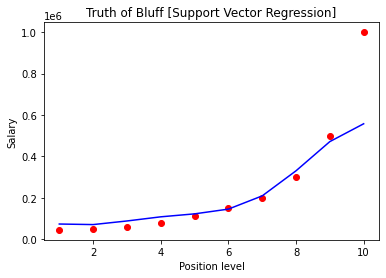

In [59]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color="red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color="blue")
plt.title("Truth of Bluff [Support Vector Regression]")
plt.xlabel("Position level")
plt.ylabel("Salary")